# "Extract Model Forcing"
including:
- MLD (all versions)
- euphotic depth
- N0
- Si0
- PAR
- SST

In [1]:
require(tidyverse, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)
require(scales, warn.conflicts = FALSE)

require(oce, warn.conflicts = FALSE)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: cowplot
Loading required package: scales
Loading required package: oce
Loading required package: testthat

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: gsw


# read files

In [2]:
# read MLD and euphotic depth file
MLD2EuZ <- read.csv("DATA_processed/MLD2EuZ.csv")

# read Date column
MLD2EuZ$Date <- as.Date(MLD2EuZ$Date, format="%Y-%m-%d")

# split file per regime

In [3]:
#split data into two regimes:
MLD2EuZ_R1 <- MLD2EuZ[!MLD2EuZ$Date>as.Date('2000-10-30') & !MLD2EuZ$Date<as.Date('1996-01-01'),]
MLD2EuZ_R2 <- MLD2EuZ[!MLD2EuZ$Date<as.Date('2006-06-30') & !MLD2EuZ$Date>as.Date('2010-12-31'),]

In [4]:
# create day of year and month columsn for aggregate plotting
MLD2EuZ_R1$dyear <- as.Date(format(MLD2EuZ_R1$Date, format="%m-%d"),format="%m-%d")
MLD2EuZ_R2$dyear <- as.Date(format(MLD2EuZ_R2$Date, format="%m-%d"),format="%m-%d")

MLD2EuZ_R1$month <- format(MLD2EuZ_R1$Date, format="%m")
MLD2EuZ_R2$month <- format(MLD2EuZ_R2$Date, format="%m")

R1ctDate <- as.POSIXlt(MLD2EuZ_R1$Date)
R2ctDate <- as.POSIXlt(MLD2EuZ_R2$Date)

R1yday <- R1ctDate$yday
R2yday <- R2ctDate$yday

# plot MLD from Pinckney et al. 2015

In [5]:
str(MLD2EuZ_R1)

'data.frame':	57 obs. of  10 variables:
 $ X       : int  3 4 5 6 7 8 9 10 11 12 ...
 $ CruiseID: Factor w/ 198 levels "93HG_001","93HG_002",..: 3 4 5 6 7 8 9 10 11 12 ...
 $ Date    : Date, format: "1996-01-12" "1996-02-13" ...
 $ MLD2015 : int  36 28 28 32 12 21 14 22 9 18 ...
 $ MLD2019 : num  10.06 8.05 10.06 7.04 8.05 ...
 $ x0.1    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ x1      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ x10     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ dyear   : Date, format: "2019-01-12" "2019-02-13" ...
 $ month   : chr  "01" "02" "03" "04" ...


In [6]:
options(repr.plot.width=11, repr.plot.height=3)

MLD1 <- ggplot() + geom_point(data=MLD2EuZ_R1,aes(x=dyear, y=MLD2015, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=MLD2EuZ_R2,aes(x=dyear, y=MLD2015, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('MLD depth [m]') + xlab('Month of year') + labs(col='Regime')

In [7]:
# plot boxplot of distribution over the year per group
MLD2 <- ggplot() + geom_boxplot(data=MLD2EuZ_R1,aes(x=reorder(month,dyear), y=MLD2015, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_boxplot(data=MLD2EuZ_R2,aes(x=reorder(month,dyear), y=MLD2015, col='Regime 2'), alpha=0.5)+ 
scale_x_discrete(limits=c("01","02","03","04","05","06","07","08","09","10","11","12"))+
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('MLD depth [m]') + xlab('Month of year') + labs(col='Regime')

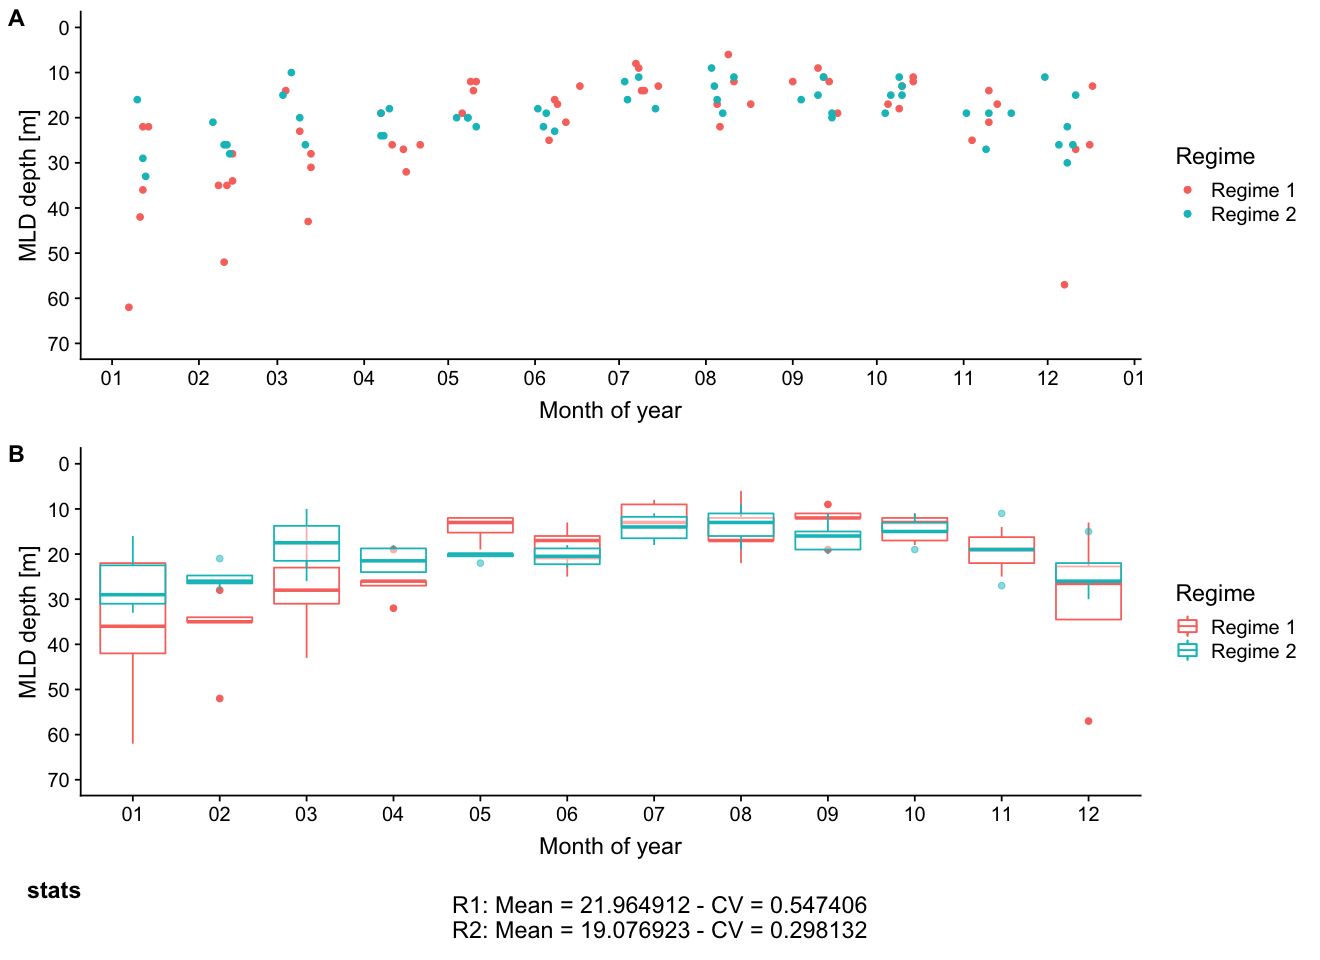

In [8]:
options(repr.plot.width=11, repr.plot.height=8)
MLDmeanR1 <- mean(MLD2EuZ_R1$MLD2015, na.rm=T)
MLDmeanR2 <- mean(MLD2EuZ_R2$MLD2015, na.rm=T)
MLDcvR1 <- sd(MLD2EuZ_R1$MLD2015, na.rm=T)/mean(MLD2EuZ_R1$MLD2015, na.rm=T)
MLDcvR2 <- sd(MLD2EuZ_R2$MLD2015, na.rm=T)/mean(MLD2EuZ_R2$MLD2015, na.rm=T)
MLDstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", MLDmeanR1, MLDcvR1, MLDmeanR2, MLDcvR2))
plot_grid(MLD1, MLD2, MLDstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [9]:
ggsave('ForcingPLOTS/MLD.pdf', width=11, height= 8)

# plot MLD from Muller-Karger et al. 2019


In [10]:
options(repr.plot.width=11, repr.plot.height=3)

MLD21 <- ggplot() + geom_point(data=MLD2EuZ_R1,aes(x=dyear, y=MLD2019, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_point(data=MLD2EuZ_R2,aes(x=dyear, y=MLD2019, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('MLD depth [m]') + xlab('Month of year') + labs(col='Regime')

In [11]:
# plot boxplot of distribution over the year per group
MLD22 <- ggplot() + geom_boxplot(data=MLD2EuZ_R1,aes(x=reorder(month,dyear), y=MLD2019, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=MLD2EuZ_R2,aes(x=reorder(month,dyear), y=MLD2019, col='Regime 2'), alpha=0.5)+ 
scale_x_discrete(limits=c("01","02","03","04","05","06","07","08","09","10","11","12"))+
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('MLD depth [m]') + xlab('Month of year') + labs(col='Regime')

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

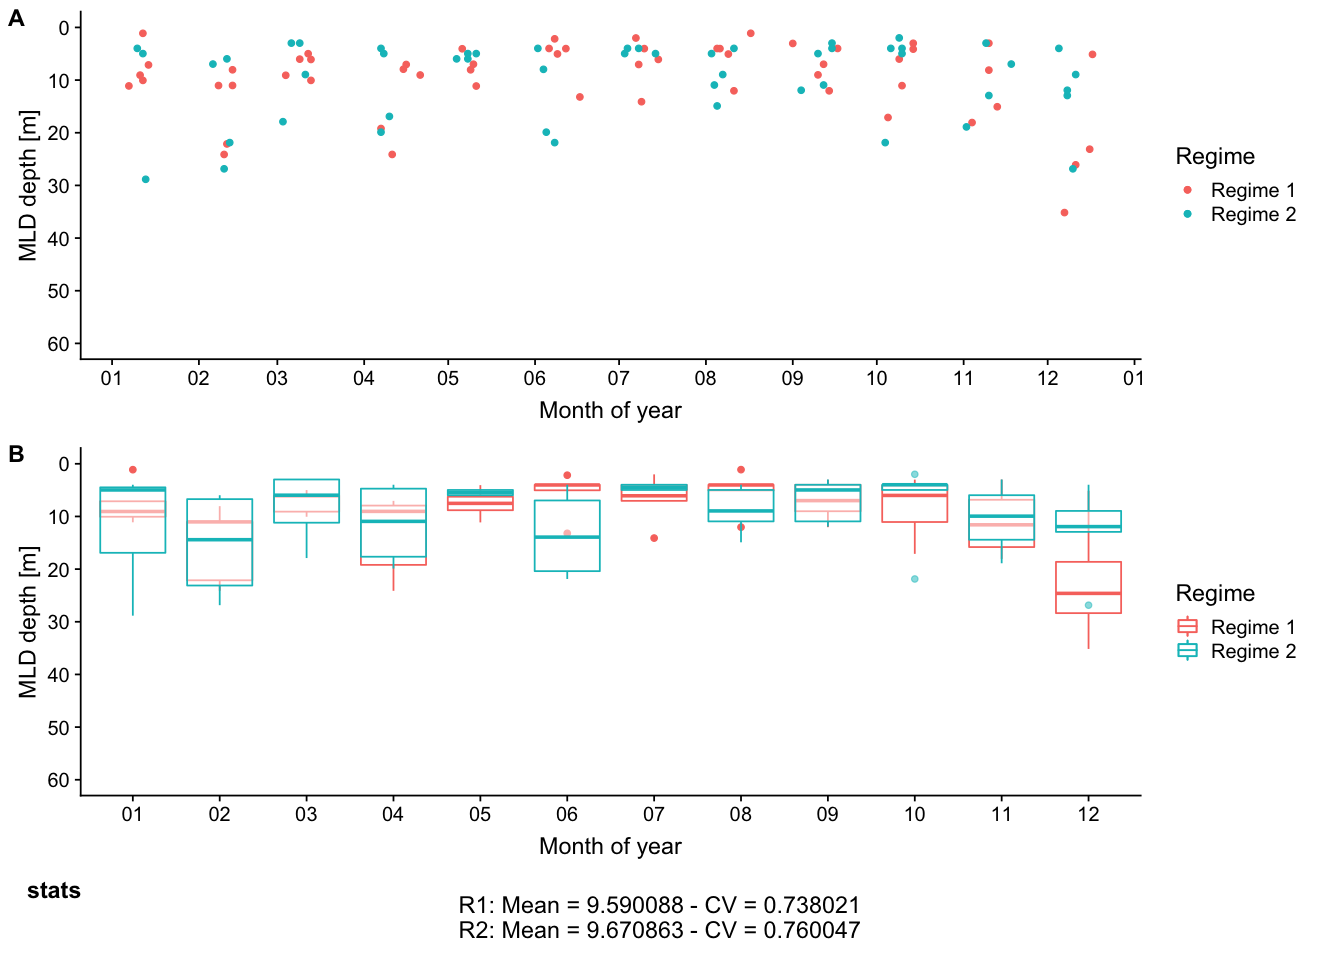

In [12]:
options(repr.plot.width=11, repr.plot.height=8)
MLD2meanR1 <- mean(MLD2EuZ_R1$MLD2019, na.rm=T)
MLD2meanR2 <- mean(MLD2EuZ_R2$MLD2019, na.rm=T)
MLD2cvR1 <- sd(MLD2EuZ_R1$MLD2019, na.rm=T)/mean(MLD2EuZ_R1$MLD2019, na.rm=T)
MLD2cvR2 <- sd(MLD2EuZ_R2$MLD2019, na.rm=T)/mean(MLD2EuZ_R2$MLD2019, na.rm=T)
MLD2stats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", MLD2meanR1, MLD2cvR1, MLD2meanR2, MLD2cvR2))
plot_grid(MLD21, MLD22, MLD2stats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

# plot euphotic depth (0.1% PAR from surface) from Pinckney et al. 2015

In [13]:
options(repr.plot.width=11, repr.plot.height=3)

EuZ1 <- ggplot() + geom_point(data=MLD2EuZ_R1,aes(x=dyear, y=x0.1, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(100,0), breaks=seq(100,0,-10))+
geom_point(data=MLD2EuZ_R2,aes(x=dyear, y=x0.1, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('euphotic depth [m]') + xlab('Month of year') + labs(col='Regime')

In [14]:
# plot boxplot of distribution over the year per group
EuZ2 <- ggplot() + geom_boxplot(data=MLD2EuZ_R1,aes(x=reorder(month,dyear), y=x0.1, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(100,0), breaks=seq(100,0,-10))+
geom_boxplot(data=MLD2EuZ_R2,aes(x=reorder(month,dyear), y=x0.1, col='Regime 2'), alpha=0.5)+ 
scale_x_discrete(limits=c("01","02","03","04","05","06","07","08","09","10","11","12"))+
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('euphotic depth [m]') + xlab('Month of year') + labs(col='Regime')

Warning message:
“Removed 31 rows containing missing values (geom_point).”Warning message:
“Removed 25 rows containing missing values (geom_point).”Warning message:
“Removed 31 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”

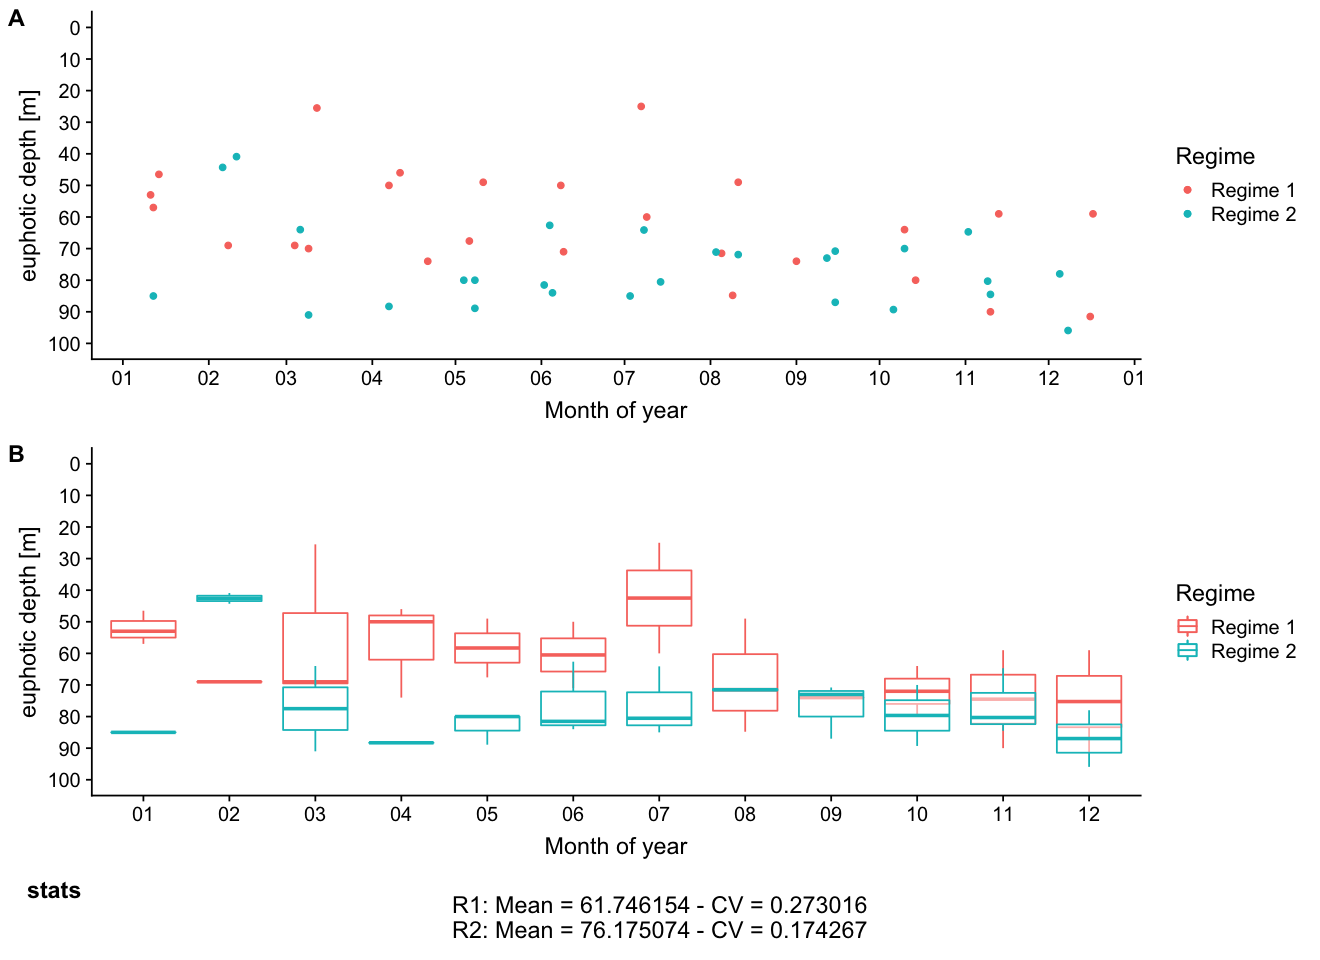

In [15]:
options(repr.plot.width=11, repr.plot.height=8)
EuZmeanR1 <- mean(MLD2EuZ_R1$x0.1, na.rm=T)
EuZmeanR2 <- mean(MLD2EuZ_R2$x0.1, na.rm=T)
EuZcvR1 <- sd(MLD2EuZ_R1$x0.1, na.rm=T)/mean(MLD2EuZ_R1$x0.1, na.rm=T)
EuZcvR2 <- sd(MLD2EuZ_R2$x0.1, na.rm=T)/mean(MLD2EuZ_R2$x0.1, na.rm=T)
EuZstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", EuZmeanR1, EuZcvR1, EuZmeanR2, EuZcvR2))
plot_grid(EuZ1, EuZ2, EuZstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [16]:
ggsave('ForcingPLOTS/EuDepth.pdf', width=11, height= 8)

# plot actual forcing with scattered dots

In [17]:
gd1 <- MLD2EuZ_R1 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            MLD2015mean = mean(MLD2015),
            MLD2015median = median(MLD2015)
        )

gd2 <- MLD2EuZ_R2 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            MLD2015mean = mean(MLD2015),
            MLD2015median = median(MLD2015)
        )

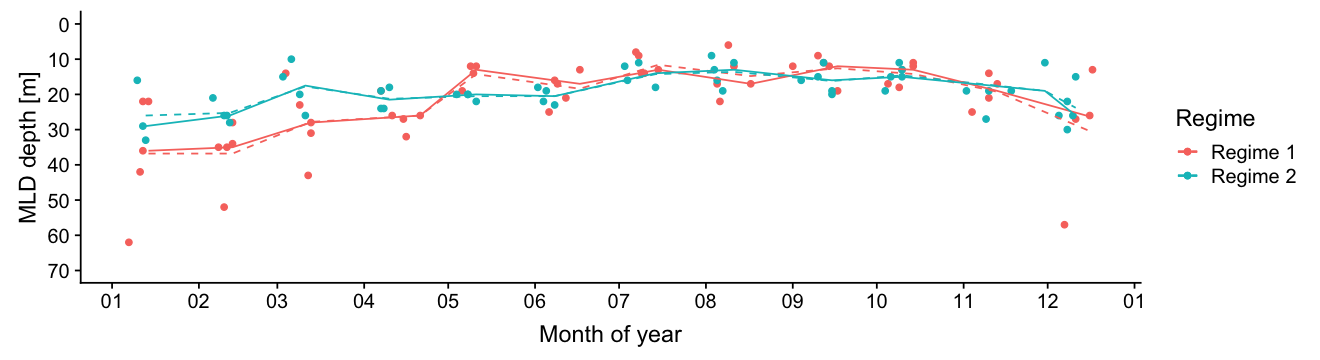

In [18]:
options(repr.plot.width=11, repr.plot.height=3)
ggplot() + geom_point(data=MLD2EuZ_R1,aes(x=dyear, y=MLD2015, col='Regime 1'))+ scale_y_continuous(trans = 'reverse', limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=MLD2EuZ_R2,aes(x=dyear, y=MLD2015, col='Regime 2')) +
geom_line(data=gd1,aes(x=dyear, y=MLD2015mean, col='Regime 1'), linetype=2) +
geom_line(data=gd2,aes(x=dyear, y=MLD2015mean, col='Regime 2'), linetype=2) +
geom_line(data=gd1,aes(x=dyear, y=MLD2015median, col='Regime 1'), linetype=1) +
geom_line(data=gd2,aes(x=dyear, y=MLD2015median, col='Regime 2'), , linetype=1) +
scale_x_date(date_breaks = 'months', labels = date_format('%m'))+
ylab('MLD depth [m]') + xlab('Month of year') + labs(col='Regime')

# export mean and median with day in year to interpolate in python

In [19]:
MLD2015_R1 <- data.frame(MLD = MLD2EuZ_R1$MLD2015,month = MLD2EuZ_R1$month, yday = R1yday)
MLD2015_R2 <- data.frame(MLD = MLD2EuZ_R2$MLD2015,month = MLD2EuZ_R2$month, yday = R2yday)

In [20]:
# Write CSV in R
write.csv(MLD2015_R1, file = "DATA_modelforcing/MLD2015_R1.csv")

write.csv(MLD2015_R2, file = "DATA_modelforcing/MLD2015_R2.csv")

# NOW Let's read nitrate and silicate data, and get value below MLD

In [21]:
#Niskin
niskin <- read.csv("DATA_processed/Master_Niskin_cleaned_2.csv")
niskin$Date <- as.Date(niskin$Date, format="%Y-%m-%d")

In [22]:
names(niskin)

[1] "X"                 "Cruise"            "Leg"              
 [4] "Day"               "Month"             "Year"             
 [7] "Depth_target"      "Depth_real"        "O2_ml_L"          
[10] "O2_umol_kg"        "SiOH4_Cumana"      "X..PO4_Cumana"    
[13] "NO3_Cumana"        "NH4."              "NO2."             
[16] "NO3NO2."           "PO4"               "SiOH4"            
[19] "pH"                "Alkalinity"        "TCO2"             
[22] "fCO2"              "Salinity_bott"     "Salinity_bottcorr"
[25] "Salinity_ctd"      "Temp_ctd"          "Sigma.t_ctd"      
[28] "TPP"               "PIP"               "POC"              
[31] "PN"                "C.N.part."         "POC.1"            
[34] "PN.1"              "DON_USF"           "DOP_USF"          
[37] "DOC"               "TOC"               "PriPro"           
[40] "Chl"               "Phaeo"             "Date"             
[43] "DateString"        "yday"

In [23]:
NO2NO3 <- niskin %>%
  select(Date, NO3NO2., Depth_real) %>%
  gather(key='key',value = "value", -Date, -Depth_real)
head(NO2NO3)

Date,Depth_real,key,value
1995-11-08,1.5,NO3NO2.,NA
1995-11-08,6.5,NO3NO2.,NA
1995-11-08,15.0,NO3NO2.,NA
1995-11-08,25.0,NO3NO2.,NA
1995-11-08,35.0,NO3NO2.,NA
1995-11-08,54.5,NO3NO2.,NA


In [24]:
zz <- seq(0, 200, 1)

In [25]:
#NO2NO3_filt <- NO2NO3 %>% 
#group_by(Date) %>%
#filter(sum(!is.na(value[Depth_real<100]))>2)
#head(NO2NO3_filt)

In [26]:
NO2NO3_int <- NO2NO3 %>%
    group_by(Date) %>%
    do(data.frame(value_int = with(.,oceApprox(Depth_real, value, zz, "rr")), depth = zz)) 

In [27]:
niskin[niskin$Date == as.Date("1998-03-12"),]$NO3NO2.

[1]  0.06  1.05  2.93  5.47  7.07  9.07    NA    NA 10.50 10.80  7.66  5.64
[13]  4.52  3.39  5.06  0.54  0.03  0.00  0.00  0.00  0.03  0.05

In [28]:
#names(NO2NO3_int)[3] <- "value_int"

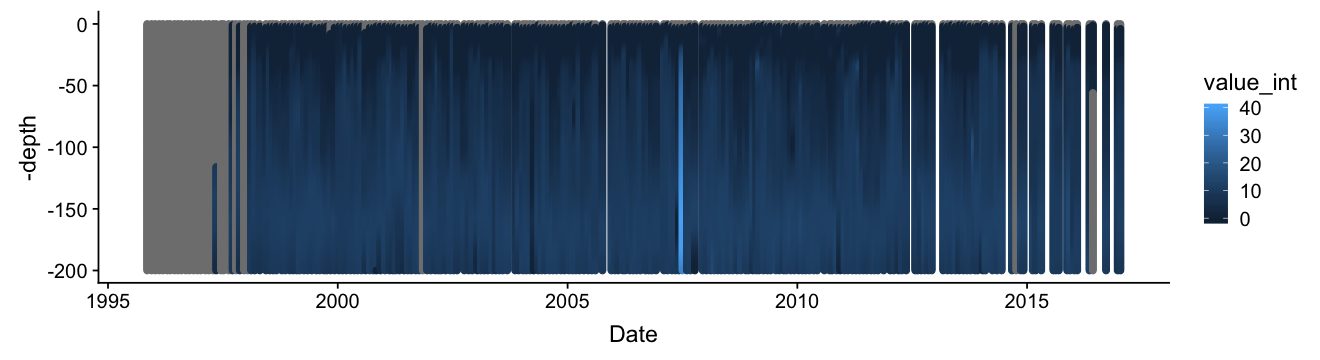

In [29]:
options(repr.plot.width=11, repr.plot.height=3)
ggplot(NO2NO3_int, aes(x=Date,y=-depth,col=value_int))+geom_point()

Warning message:
“Removed 5958 rows containing missing values (geom_point).”

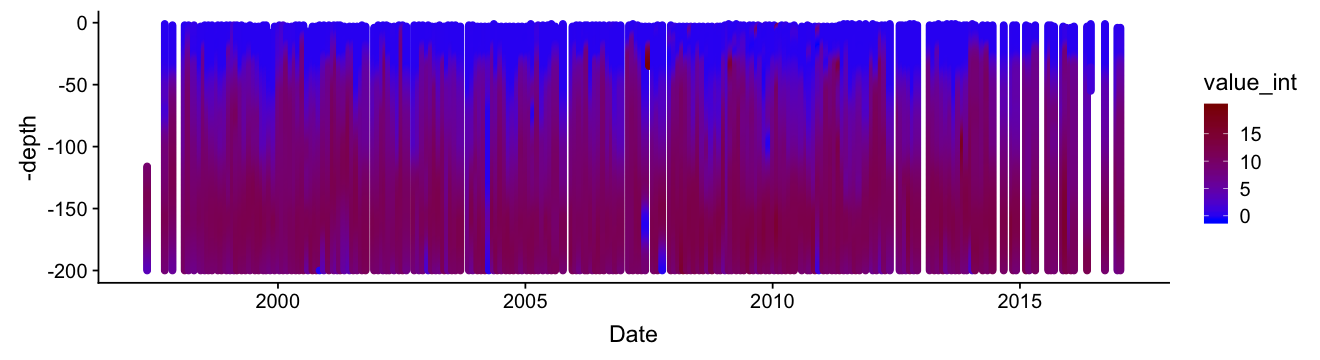

In [82]:

ggplot(data=NO2NO3_int[NO2NO3_int$value_int <20,],aes(x = Date, y = -depth, col = value_int))+ geom_point()+
scale_color_gradient(low="blue", high="darkred")

## check phosphate quickly

In [84]:
PO4 <- niskin %>%
  select(Date, PO4, Depth_real) %>%
  gather(key='key',value = "value", -Date, -Depth_real)
head(PO4)

Date,Depth_real,key,value
1995-11-08,1.5,PO4,NA
1995-11-08,6.5,PO4,NA
1995-11-08,15.0,PO4,NA
1995-11-08,25.0,PO4,NA
1995-11-08,35.0,PO4,NA
1995-11-08,54.5,PO4,NA


In [89]:
zz <- seq(0, 300, 1)

In [90]:
PO4_int <- PO4 %>%
    group_by(Date) %>%
    do(data.frame(value_int = with(.,oceApprox(Depth_real, value, zz, "rr")), depth = zz)) 

Warning message:
“Removed 8697 rows containing missing values (geom_point).”

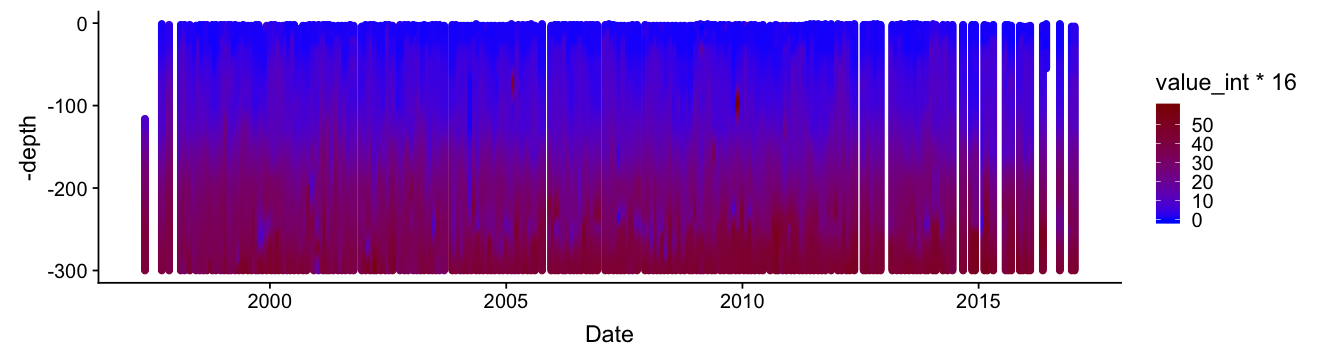

In [101]:
ggplot(data=PO4_int[PO4_int$value_int <100,],aes(x = Date, y = -depth, col = value_int))+ geom_point()+
scale_color_gradient(low="blue", high="darkred")

In [98]:
merge_PO4_mld <- merge(PO4_int, MLD2EuZ, by="Date")

merge_PO4_mld$depthdiff <- merge_PO4_mld$MLD2015 - merge_PO4_mld$depth

In [99]:
PO4_at_mld <- merge_PO4_mld %>%
  group_by(Date) %>% # this groups it by the run number 
  filter(depthdiff < 0) %>% # only keep values below MLD
  arrange(desc(depthdiff))%>% # arrange with smallest depth difference at the top
  slice(1) %>% # takes the topmost value (i.e. closest below MLD)
  ungroup() #removes grouping

head(PO4_at_mld)
#niskin_at_mld_filtered <- niskin_at_mld[niskin_at_mld$depthdiff>-15,] # only take values up to 17 meters below MLD

Date,value_int,depth,X,CruiseID,MLD2015,MLD2019,x0.1,x1,x10,depthdiff
1996-01-12,NA,37,3,93HG_003,36,10.057,NA,NA,NA,-1
1996-02-13,NA,29,4,93HG_004,28,8.046,NA,NA,NA,-1
1996-03-13,NA,29,5,93HG_005,28,10.057,NA,NA,NA,-1
1996-04-16,NA,33,6,93HG_006,32,7.040,NA,NA,NA,-1
1996-05-09,NA,13,7,93HG_007,12,8.046,NA,NA,NA,-1
1996-06-12,NA,22,8,93HG_008,21,4.023,NA,NA,NA,-1


Warning message:
“Removed 24 rows containing missing values (geom_point).”

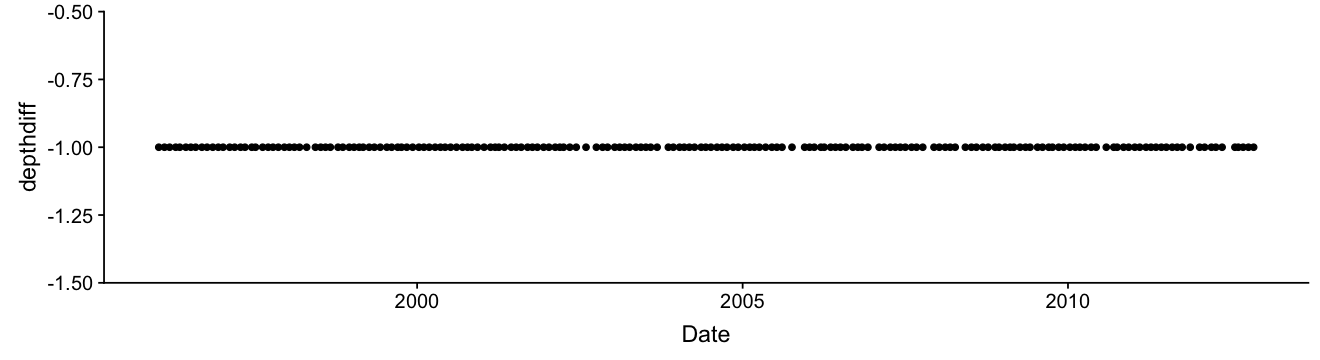

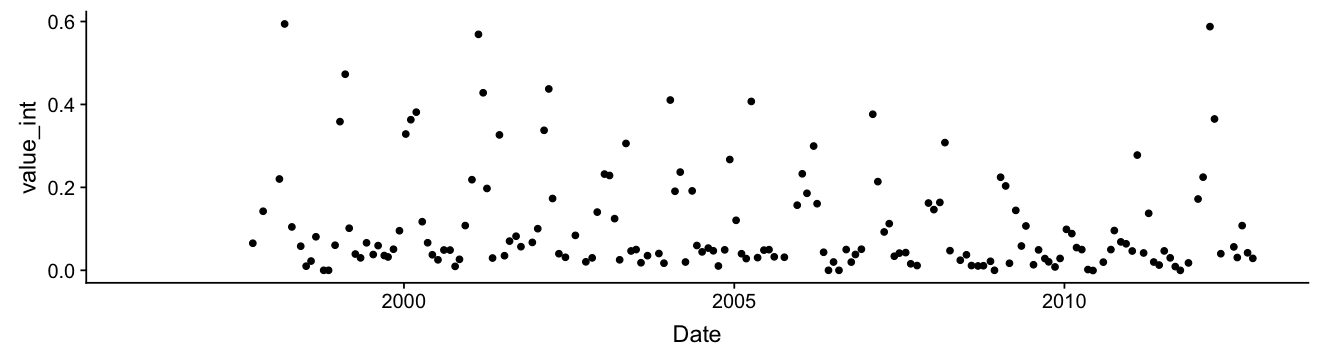

In [100]:
ggplot() + geom_point(data=PO4_at_mld, aes(x=Date,y=depthdiff))
ggplot() + geom_point(data=PO4_at_mld, aes(x=Date,y=value_int))

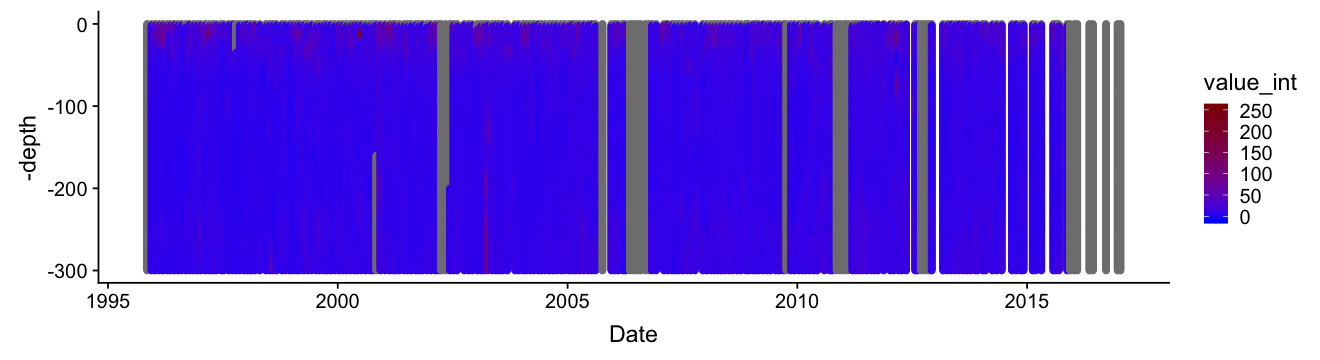

## back to nitrate

In [31]:
merge_NO2NO3_mld <- merge(NO2NO3_int, MLD2EuZ, by="Date")

merge_NO2NO3_mld$depthdiff <- merge_NO2NO3_mld$MLD2015 - merge_NO2NO3_mld$depth

In [32]:
NO2NO3_at_mld <- merge_NO2NO3_mld %>%
  group_by(Date) %>% # this groups it by the run number 
  filter(depthdiff < 0) %>% # only keep values below MLD
  arrange(desc(depthdiff))%>% # arrange with smallest depth difference at the top
  slice(1) %>% # takes the topmost value (i.e. closest below MLD)
  ungroup() #removes grouping

head(NO2NO3_at_mld)
#niskin_at_mld_filtered <- niskin_at_mld[niskin_at_mld$depthdiff>-15,] # only take values up to 17 meters below MLD

Date,value_int,depth,X,CruiseID,MLD2015,MLD2019,x0.1,x1,x10,depthdiff
1996-01-12,NA,37,3,93HG_003,36,10.057,NA,NA,NA,-1
1996-02-13,NA,29,4,93HG_004,28,8.046,NA,NA,NA,-1
1996-03-13,NA,29,5,93HG_005,28,10.057,NA,NA,NA,-1
1996-04-16,NA,33,6,93HG_006,32,7.040,NA,NA,NA,-1
1996-05-09,NA,13,7,93HG_007,12,8.046,NA,NA,NA,-1
1996-06-12,NA,22,8,93HG_008,21,4.023,NA,NA,NA,-1


Warning message:
“Removed 24 rows containing missing values (geom_point).”

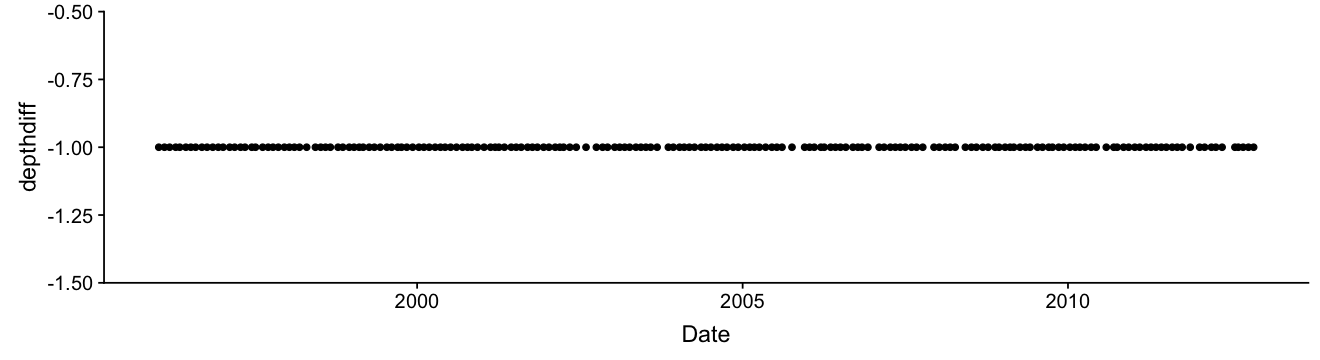

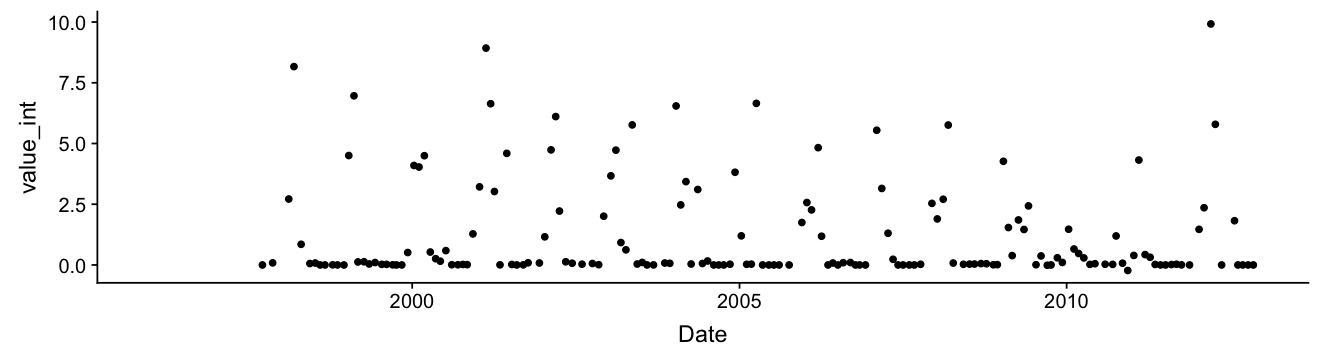

In [33]:
ggplot() + geom_point(data=NO2NO3_at_mld, aes(x=Date,y=depthdiff))
ggplot() + geom_point(data=NO2NO3_at_mld, aes(x=Date,y=value_int))

In [34]:
# create day of year and month columsn for aggregate plotting
NO2NO3_at_mld$dyear <- as.Date(format(NO2NO3_at_mld$Date, format="%m-%d"),format="%m-%d")

NO2NO3_at_mld$month <- format(NO2NO3_at_mld$Date, format="%m")

#split data into two regimes:
NO2NO3_at_mld_R1 <- NO2NO3_at_mld[!NO2NO3_at_mld$Date>as.Date('2000-10-30') & !NO2NO3_at_mld$Date<as.Date('1996-01-01'),]
NO2NO3_at_mld_R2 <- NO2NO3_at_mld[!NO2NO3_at_mld$Date<as.Date('2006-06-30') & !NO2NO3_at_mld$Date>as.Date('2010-12-31'),]

In [35]:
NO2NO3R1ctDate <- as.POSIXlt(NO2NO3_at_mld_R1$Date)
NO2NO3R2ctDate <- as.POSIXlt(NO2NO3_at_mld_R2$Date)

NO2NO3R1yday <- NO2NO3R1ctDate$yday
NO2NO3R2yday <- NO2NO3R2ctDate$yday

In [36]:
str(NO2NO3_at_mld_R1)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	57 obs. of  13 variables:
 $ Date     : Date, format: "1996-01-12" "1996-02-13" ...
 $ value_int: num  NA NA NA NA NA NA NA NA NA NA ...
 $ depth    : num  37 29 29 33 13 22 15 23 10 19 ...
 $ X        : int  3 4 5 6 7 8 9 10 11 12 ...
 $ CruiseID : Factor w/ 198 levels "93HG_001","93HG_002",..: 3 4 5 6 7 8 9 10 11 12 ...
 $ MLD2015  : int  36 28 28 32 12 21 14 22 9 18 ...
 $ MLD2019  : num  10.06 8.05 10.06 7.04 8.05 ...
 $ x0.1     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ x1       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ x10      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ depthdiff: num  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ dyear    : Date, format: "2019-01-12" "2019-02-13" ...
 $ month    : chr  "01" "02" "03" "04" ...


In [37]:
options(repr.plot.width=11, repr.plot.height=3)

NO2NO3_1 <- ggplot() + geom_point(data=NO2NO3_at_mld_R1,aes(x=dyear, y=value_int, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=NO2NO3_at_mld_R2,aes(x=dyear, y=value_int, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('NO3+NO3 [µM]') + xlab('Month of year') + labs(col='Regime')

In [38]:
# plot boxplot of distribution over the year per group
NO2NO3_2 <- ggplot() + geom_boxplot(data=NO2NO3_at_mld_R1,aes(x=reorder(month,dyear), y=value_int, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_boxplot(data=NO2NO3_at_mld_R2,aes(x=reorder(month,dyear), y=value_int, col='Regime 2'), alpha=0.5)+ 
scale_x_discrete(limits=c("01","02","03","04","05","06","07","08","09","10","11","12"))+
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('NO3+NO3 [µM]') + xlab('Month of year') + labs(col='Regime')

Warning message:
“Removed 23 rows containing missing values (geom_point).”Warning message:
“Removed 23 rows containing non-finite values (stat_boxplot).”

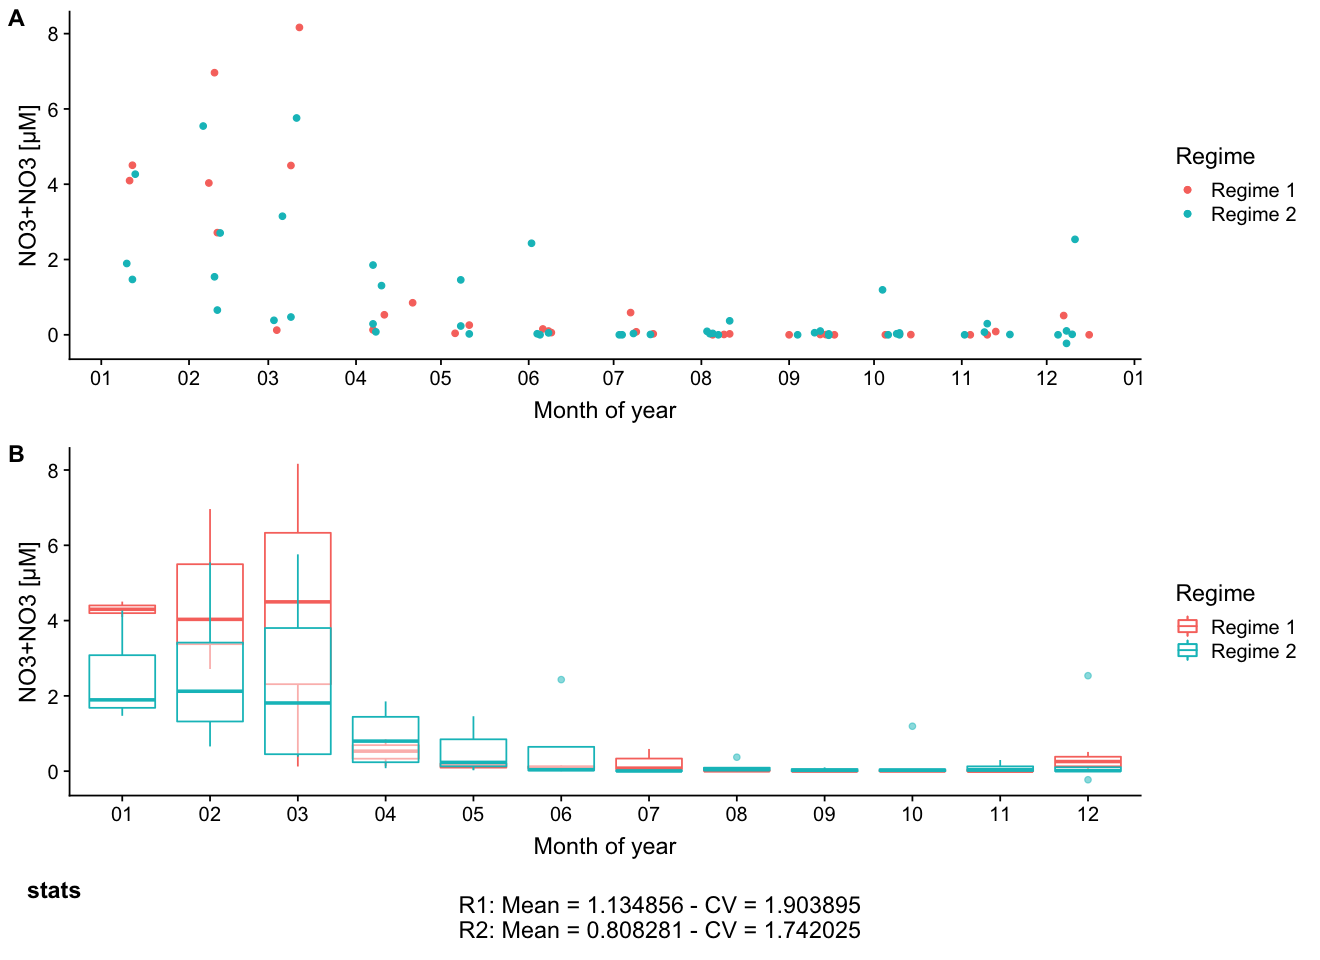

In [39]:
options(repr.plot.width=11, repr.plot.height=8)
NO2NO3meanR1 <- mean(NO2NO3_at_mld_R1$value_int, na.rm=T)
NO2NO3meanR2 <- mean(NO2NO3_at_mld_R2$value_int, na.rm=T)
NO2NO3cvR1 <- sd(NO2NO3_at_mld_R1$value_int, na.rm=T)/mean(NO2NO3_at_mld_R1$value_int, na.rm=T)
NO2NO3cvR2 <- sd(NO2NO3_at_mld_R2$value_int, na.rm=T)/mean(NO2NO3_at_mld_R2$value_int, na.rm=T)
NO2NO3stats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", NO2NO3meanR1, NO2NO3cvR1, NO2NO3meanR2, NO2NO3cvR2))
plot_grid(NO2NO3_1, NO2NO3_2, NO2NO3stats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [40]:
ggsave('ForcingPLOTS/NO3NO2.pdf', width=11, height= 8)

In [41]:
N1 <- NO2NO3_at_mld_R1 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            mean = mean(value_int, na.rm=T),
            median = median(value_int, na.rm=T)
        )

N2 <- NO2NO3_at_mld_R2 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            mean = mean(value_int, na.rm=T),
            median = median(value_int, na.rm=T)
        )

Warning message:
“Removed 23 rows containing missing values (geom_point).”

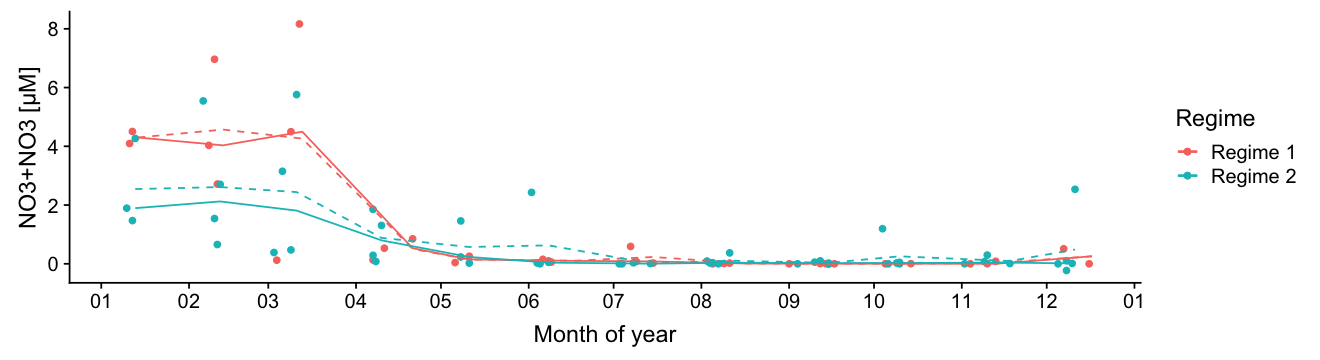

In [42]:
options(repr.plot.width=11, repr.plot.height=3)
ggplot() + geom_point(data=NO2NO3_at_mld_R1,aes(x=dyear, y=value_int, col='Regime 1'))+ #scale_y_continuous(trans = 'reverse', limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=NO2NO3_at_mld_R2,aes(x=dyear, y=value_int, col='Regime 2')) +
geom_line(data=N1,aes(x=dyear, y=mean, col='Regime 1'), linetype=2) +
geom_line(data=N2,aes(x=dyear, y=mean, col='Regime 2'), linetype=2) +
geom_line(data=N1,aes(x=dyear, y=median, col='Regime 1'), linetype=1) +
geom_line(data=N2,aes(x=dyear, y=median, col='Regime 2'), , linetype=1) +
scale_x_date(date_breaks = 'months', labels = date_format('%m'))+
ylab('NO3+NO3 [µM]') + xlab('Month of year') + labs(col='Regime')

# write Nitrogen Data to csv

In [43]:
NO2NO3_R1 <- data.frame(NO2NO3 = NO2NO3_at_mld_R1$value_int, month = NO2NO3_at_mld_R1$month, yday = NO2NO3R1yday)
NO2NO3_R2 <- data.frame(NO2NO3 = NO2NO3_at_mld_R2$value_int, month = NO2NO3_at_mld_R2$month, yday = NO2NO3R2yday)

In [44]:
# Write CSV in R
write.csv(NO2NO3_R1, file = "DATA_modelforcing/NO2NO3_R1.csv")
write.csv(NO2NO3_R2, file = "DATA_modelforcing/NO2NO3_R2.csv")

# get silicate data

In [45]:
SiOH <- niskin %>%
  select(Date, SiOH4, Depth_real) %>%
  gather(key='key',value = "value", -Date, -Depth_real)
head(SiOH)

Date,Depth_real,key,value
1995-11-08,1.5,SiOH4,NA
1995-11-08,6.5,SiOH4,NA
1995-11-08,15.0,SiOH4,NA
1995-11-08,25.0,SiOH4,NA
1995-11-08,35.0,SiOH4,NA
1995-11-08,54.5,SiOH4,NA


In [46]:
SiOH_int <- SiOH %>%
    group_by(Date) %>%
    do(data.frame(value_int = with(.,oceApprox(Depth_real, value, zz, "rr")), depth = zz)) 

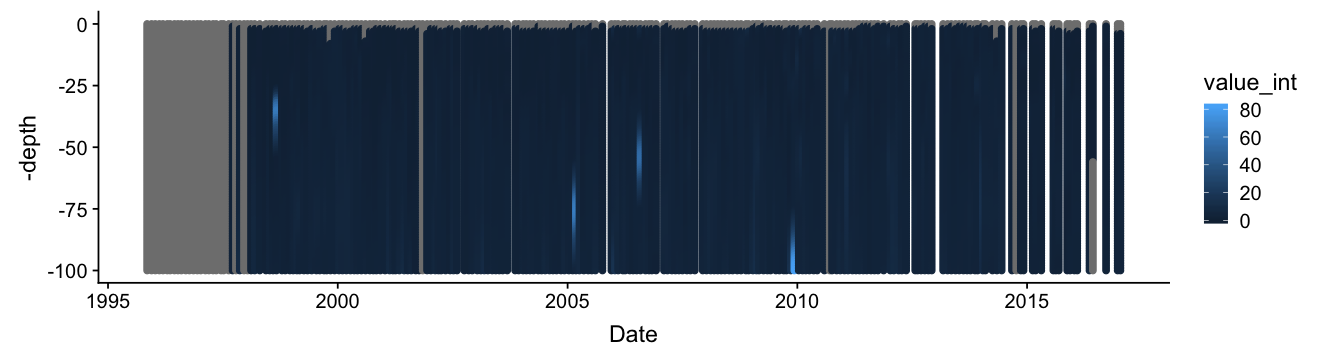

In [47]:
ggplot(SiOH_int, aes(x=Date,y=-depth,col=value_int))+geom_point()

In [48]:
merge_SiOH_mld <- merge(SiOH_int, MLD2EuZ, by="Date")

merge_SiOH_mld$depthdiff <- merge_SiOH_mld$MLD2015 - merge_NO2NO3_mld$depth

In [49]:
SiOH_at_mld <- merge_SiOH_mld %>%
  group_by(Date) %>% # this groups it by the run number 
  filter(depthdiff < 0) %>% # only keep values below MLD
  arrange(desc(depthdiff))%>% # arrange with smallest depth difference at the top
  slice(1) %>% # takes the topmost value (i.e. closest below MLD)
  ungroup() #removes grouping

head(SiOH_at_mld)
#niskin_at_mld_filtered <- niskin_at_mld[niskin_at_mld$depthdiff>-15,] # only take values up to 17 meters below MLD

Date,value_int,depth,X,CruiseID,MLD2015,MLD2019,x0.1,x1,x10,depthdiff
1996-01-12,NA,37,3,93HG_003,36,10.057,NA,NA,NA,-1
1996-02-13,NA,29,4,93HG_004,28,8.046,NA,NA,NA,-1
1996-03-13,NA,29,5,93HG_005,28,10.057,NA,NA,NA,-1
1996-04-16,NA,33,6,93HG_006,32,7.040,NA,NA,NA,-1
1996-05-09,NA,13,7,93HG_007,12,8.046,NA,NA,NA,-1
1996-06-12,NA,22,8,93HG_008,21,4.023,NA,NA,NA,-1


Warning message:
“Removed 25 rows containing missing values (geom_point).”

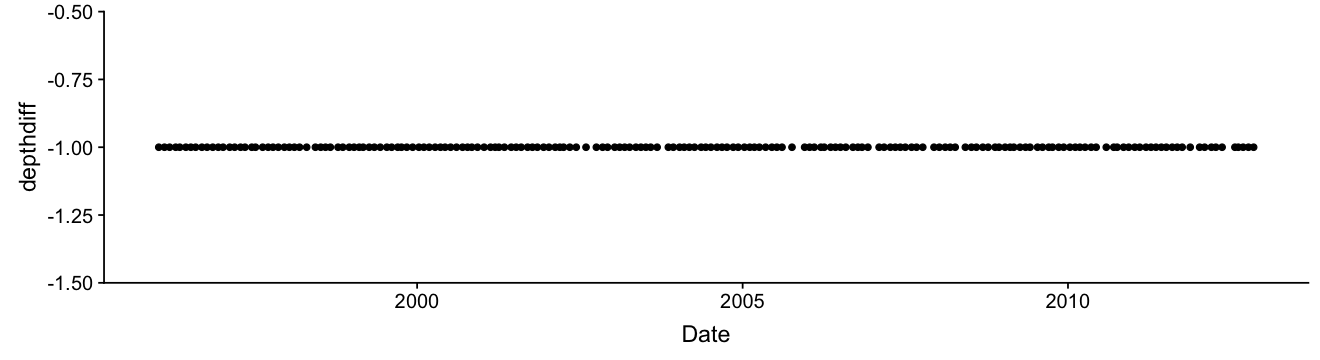

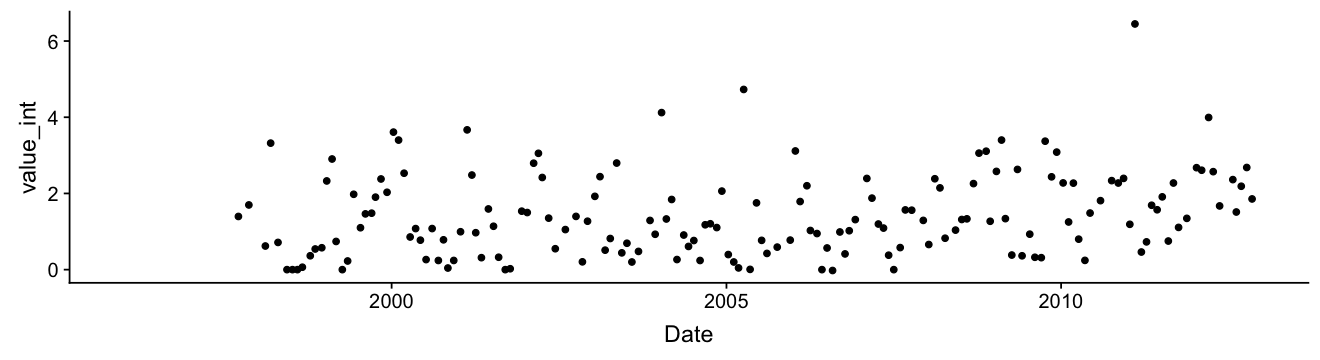

In [50]:
ggplot() + geom_point(data=SiOH_at_mld, aes(x=Date,y=depthdiff))
ggplot() + geom_point(data=SiOH_at_mld, aes(x=Date,y=value_int))

In [51]:
# create day of year and month columsn for aggregate plotting
SiOH_at_mld$dyear <- as.Date(format(SiOH_at_mld$Date, format="%m-%d"),format="%m-%d")

SiOH_at_mld$month <- format(SiOH_at_mld$Date, format="%m")

#split data into two regimes:
SiOH_at_mld_R1 <- SiOH_at_mld[!SiOH_at_mld$Date>as.Date('2000-10-30') & !SiOH_at_mld$Date<as.Date('1996-01-01'),]
SiOH_at_mld_R2 <- SiOH_at_mld[!SiOH_at_mld$Date<as.Date('2006-06-30') & !SiOH_at_mld$Date>as.Date('2010-12-31'),]

In [52]:
SiOHR1ctDate <- as.POSIXlt(SiOH_at_mld_R1$Date)
SiOHR2ctDate <- as.POSIXlt(SiOH_at_mld_R2$Date)

SiOHR1yday <- SiOHR1ctDate$yday
SiOHR2yday <- SiOHR2ctDate$yday

In [53]:
str(SiOH_at_mld_R1)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	57 obs. of  13 variables:
 $ Date     : Date, format: "1996-01-12" "1996-02-13" ...
 $ value_int: num  NA NA NA NA NA NA NA NA NA NA ...
 $ depth    : num  37 29 29 33 13 22 15 23 10 19 ...
 $ X        : int  3 4 5 6 7 8 9 10 11 12 ...
 $ CruiseID : Factor w/ 198 levels "93HG_001","93HG_002",..: 3 4 5 6 7 8 9 10 11 12 ...
 $ MLD2015  : int  36 28 28 32 12 21 14 22 9 18 ...
 $ MLD2019  : num  10.06 8.05 10.06 7.04 8.05 ...
 $ x0.1     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ x1       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ x10      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ depthdiff: num  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ dyear    : Date, format: "2019-01-12" "2019-02-13" ...
 $ month    : chr  "01" "02" "03" "04" ...


In [54]:
options(repr.plot.width=11, repr.plot.height=3)

SiOH_1 <- ggplot() + geom_point(data=SiOH_at_mld_R1,aes(x=dyear, y=value_int, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=SiOH_at_mld_R2,aes(x=dyear, y=value_int, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('SiOH [µM]') + xlab('Month of year') + labs(col='Regime')

In [55]:
# plot boxplot of distribution over the year per group
SiOH_2 <- ggplot() + geom_boxplot(data=SiOH_at_mld_R1,aes(x=reorder(month,dyear), y=value_int, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_boxplot(data=SiOH_at_mld_R2,aes(x=reorder(month,dyear), y=value_int, col='Regime 2'), alpha=0.5)+ 
scale_x_discrete(limits=c("01","02","03","04","05","06","07","08","09","10","11","12"))+
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('SiOH [µM]') + xlab('Month of year') + labs(col='Regime')

Warning message:
“Removed 23 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 23 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

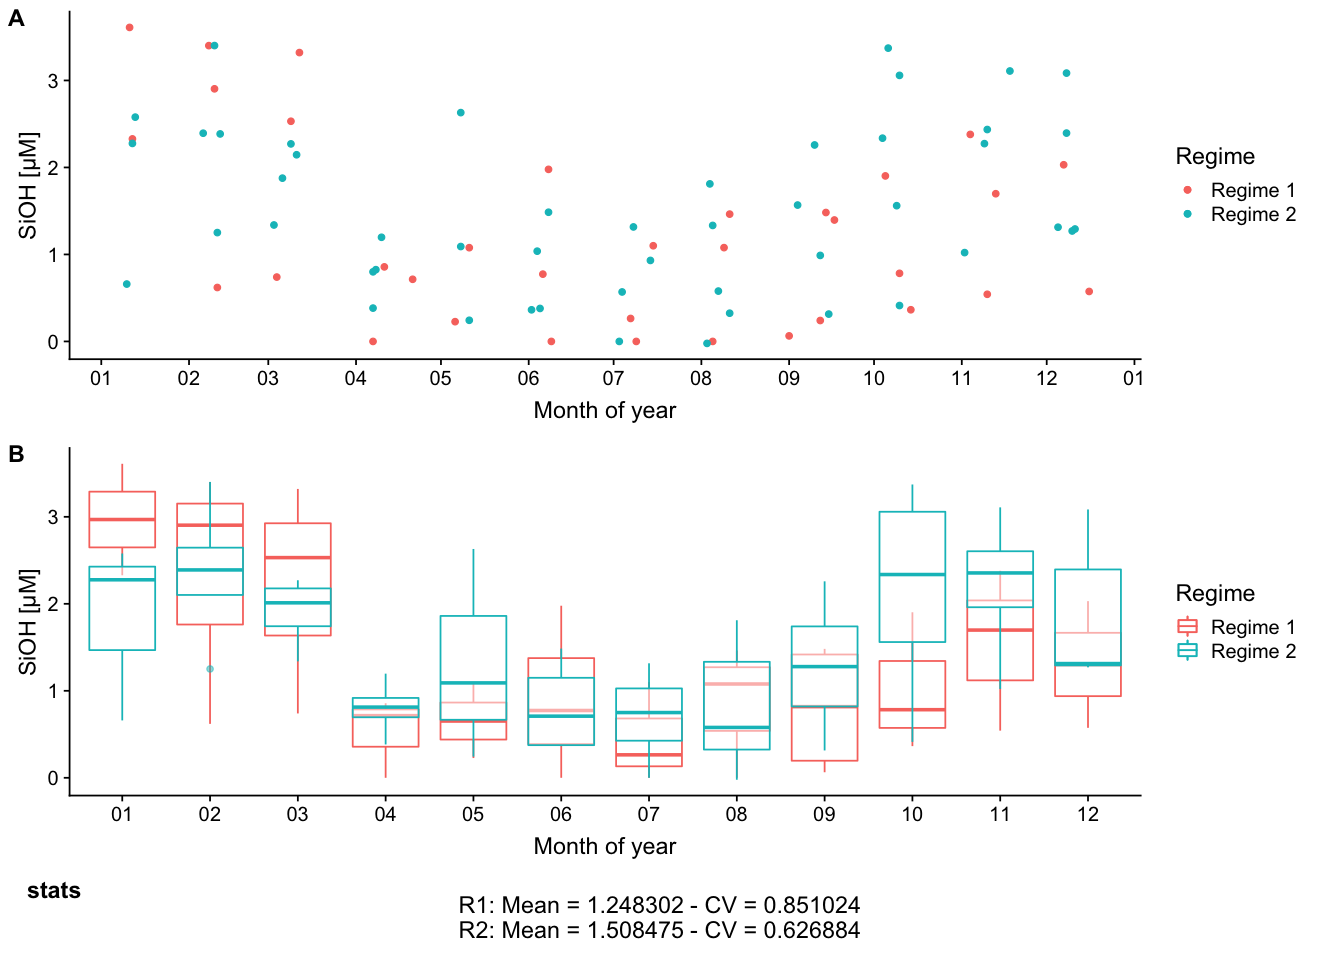

In [56]:
options(repr.plot.width=11, repr.plot.height=8)
SiOHmeanR1 <- mean(SiOH_at_mld_R1$value_int, na.rm=T)
SiOHmeanR2 <- mean(SiOH_at_mld_R2$value_int, na.rm=T)
SiOHcvR1 <- sd(SiOH_at_mld_R1$value_int, na.rm=T)/mean(SiOH_at_mld_R1$value_int, na.rm=T)
SiOHcvR2 <- sd(SiOH_at_mld_R2$value_int, na.rm=T)/mean(SiOH_at_mld_R2$value_int, na.rm=T)
SiOHstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", SiOHmeanR1, SiOHcvR1, SiOHmeanR2, SiOHcvR2))
plot_grid(SiOH_1, SiOH_2, SiOHstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [57]:
ggsave('ForcingPLOTS/SiOH.pdf', width=11, height= 8)

In [58]:
Si1 <- SiOH_at_mld_R1 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            mean = mean(value_int, na.rm=T),
            median = median(value_int, na.rm=T)
        )

Si2 <- SiOH_at_mld_R2 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            mean = mean(value_int, na.rm=T),
            median = median(value_int, na.rm=T)
        )

Warning message:
“Removed 23 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

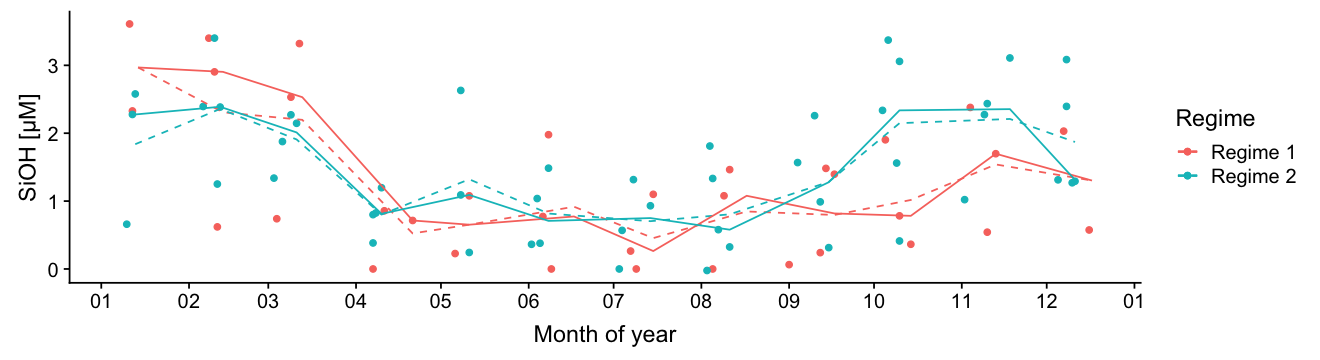

In [59]:
options(repr.plot.width=11, repr.plot.height=3)
ggplot() + geom_point(data=SiOH_at_mld_R1,aes(x=dyear, y=value_int, col='Regime 1'))+ #scale_y_continuous(trans = 'reverse', limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=SiOH_at_mld_R2,aes(x=dyear, y=value_int, col='Regime 2')) +
geom_line(data=Si1,aes(x=dyear, y=mean, col='Regime 1'), linetype=2) +
geom_line(data=Si2,aes(x=dyear, y=mean, col='Regime 2'), linetype=2) +
geom_line(data=Si1,aes(x=dyear, y=median, col='Regime 1'), linetype=1) +
geom_line(data=Si2,aes(x=dyear, y=median, col='Regime 2'), , linetype=1) +
scale_x_date(date_breaks = 'months', labels = date_format('%m'))+
ylab('SiOH [µM]') + xlab('Month of year') + labs(col='Regime')

# write Silicate Data to csv

In [60]:
SiOH_R1 <- data.frame(SiOH = SiOH_at_mld_R1$value_int, month = SiOH_at_mld_R1$month, yday = SiOHR1yday)
SiOH_R2 <- data.frame(SiOH = SiOH_at_mld_R2$value_int, month = SiOH_at_mld_R2$month, yday = SiOHR2yday)

In [61]:
# Write CSV in R
write.csv(SiOH_R1, file = "DATA_modelforcing/SiOH_R1.csv")
write.csv(SiOH_R2, file = "DATA_modelforcing/SiOH_R2.csv")

# GET PAR AND SST

## SST from CTD measurements

In [62]:
# read MLD and euphotic depth file
ctd <- read.csv("DATA_processed/CTDdat_processed.csv")

# read Date column
ctd$Date <- as.Date(ctd$Date, format="%Y-%m-%d")

In [63]:
head(ctd)

X,CruiseID,Date,month,days,press,depth,lat,lon,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla
1,93HG_001,1995-11-08,11,311,2.011,2,10.5,-64.67,23.764,23.764,27.522,36.612,27.522,NA,NA,NA
2,93HG_001,1995-11-08,11,311,4.023,4,10.5,-64.67,23.775,23.775,27.488,36.612,27.489,NA,NA,NA
3,93HG_001,1995-11-08,11,311,6.034,6,10.5,-64.67,23.782,23.782,27.464,36.614,27.465,NA,NA,NA
4,93HG_001,1995-11-08,11,311,8.046,8,10.5,-64.67,23.786,23.787,27.456,36.613,27.458,NA,NA,NA
5,93HG_001,1995-11-08,11,311,10.057,10,10.5,-64.67,23.787,23.787,27.452,36.613,27.454,NA,NA,NA
6,93HG_001,1995-11-08,11,311,12.069,12,10.5,-64.67,23.787,23.788,27.449,36.612,27.452,NA,NA,NA


In [64]:
SST <- ctd %>%
    group_by(Date) %>%
    filter(press < 5) %>%
    summarize(SST = mean(temp)) #%>% 
    #select(Date, SST) %>%
    #gather(key='key',value = "value", -Date)

In [65]:
SST2 <- ctd %>%
  select(Date, temp, press) %>%
  gather(key='key',value = "value", -Date, -press)
head(SST2)

Date,press,key,value
1995-11-08,2.011,temp,27.522
1995-11-08,4.023,temp,27.489
1995-11-08,6.034,temp,27.465
1995-11-08,8.046,temp,27.458
1995-11-08,10.057,temp,27.454
1995-11-08,12.069,temp,27.452


In [66]:
SST_int <- SST2 %>%
    group_by(Date) %>%
    do(data.frame(value_int = with(.,oceApprox(press, value, zz, "rr")), depth = zz)) 

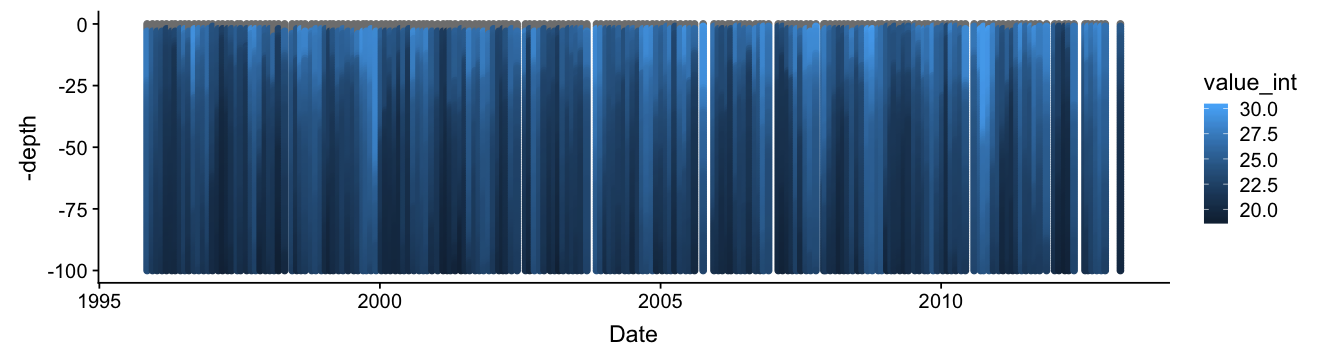

In [67]:
ggplot(SST_int, aes(x=Date,y=-depth,col=value_int))+geom_point()

In [68]:
merge_SST_mld <- merge(SST_int, MLD2EuZ, by="Date")

merge_SST_mld$depthdiff <- merge_SST_mld$MLD2015 - merge_SST_mld$depth

In [69]:
SST_above_mld <- merge_SST_mld %>%
  group_by(Date) %>% # this groups it by the run number 
  filter(depthdiff > 0) %>% # only keep values below MLD
  summarize(SST=mean(value_int, na.rm=T))

head(SST_above_mld)
#niskin_at_mld_filtered <- niskin_at_mld[niskin_at_mld$depthdiff>-15,] # only take values up to 17 meters below MLD

Date,SST
1996-01-12,23.88666
1996-02-13,23.53853
1996-03-13,22.25103
1996-04-16,22.29662
1996-05-09,22.50429
1996-06-12,24.57370


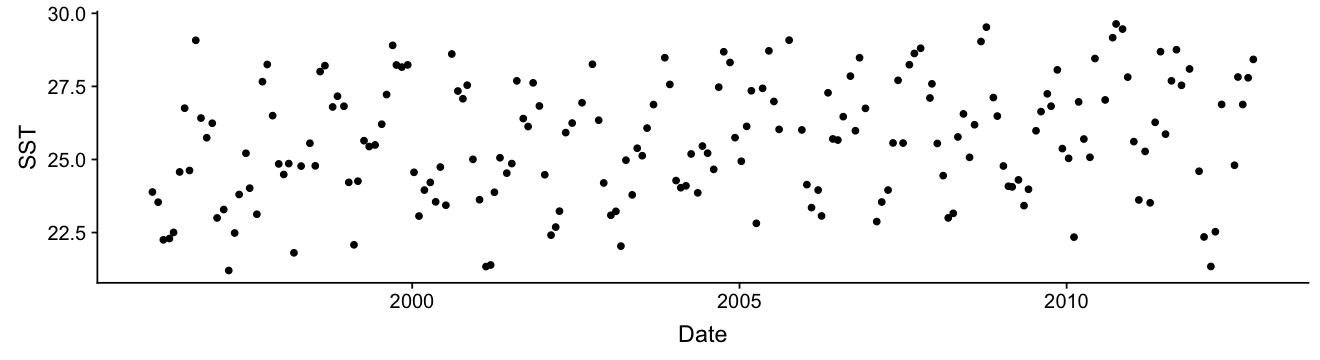

In [70]:
#ggplot() + geom_point(data=SST_above_mld, aes(x=Date,y=depthdiff))
ggplot() + geom_point(data=SST_above_mld, aes(x=Date,y=SST))

In [71]:
SST <- SST_above_mld

In [72]:
# create day of year and month columsn for aggregate plotting
SST$dyear <- as.Date(format(SST$Date, format="%m-%d"),format="%m-%d")

SST$month <- format(SST$Date, format="%m")

#split data into two regimes:
SST_R1 <- SST[!SST$Date>as.Date('2000-10-30') & !SST$Date<as.Date('1996-01-01'),]
SST_R2 <- SST[!SST$Date<as.Date('2006-06-30') & !SST$Date>as.Date('2010-12-31'),]

In [73]:
SSTR1ctDate <- as.POSIXlt(SST_R1$Date)
SSTR2ctDate <- as.POSIXlt(SST_R2$Date)

SSTR1yday <- SSTR1ctDate$yday
SSTR2yday <- SSTR2ctDate$yday

In [74]:
options(repr.plot.width=11, repr.plot.height=3)

SST_1 <- ggplot() + geom_point(data=SST_R1,aes(x=dyear, y=SST, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=SST_R2,aes(x=dyear, y=SST, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('SST [°C]') + xlab('Month of year') + labs(col='Regime')

In [75]:
# plot boxplot of distribution over the year per group
SST_2 <- ggplot() + geom_boxplot(data=SST_R1,aes(x=reorder(month,dyear), y=SST, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_boxplot(data=SST_R2,aes(x=reorder(month,dyear), y=SST, col='Regime 2'), alpha=0.5)+ 
scale_x_discrete(limits=c("01","02","03","04","05","06","07","08","09","10","11","12"))+
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('SST [°C]') + xlab('Month of year') + labs(col='Regime')

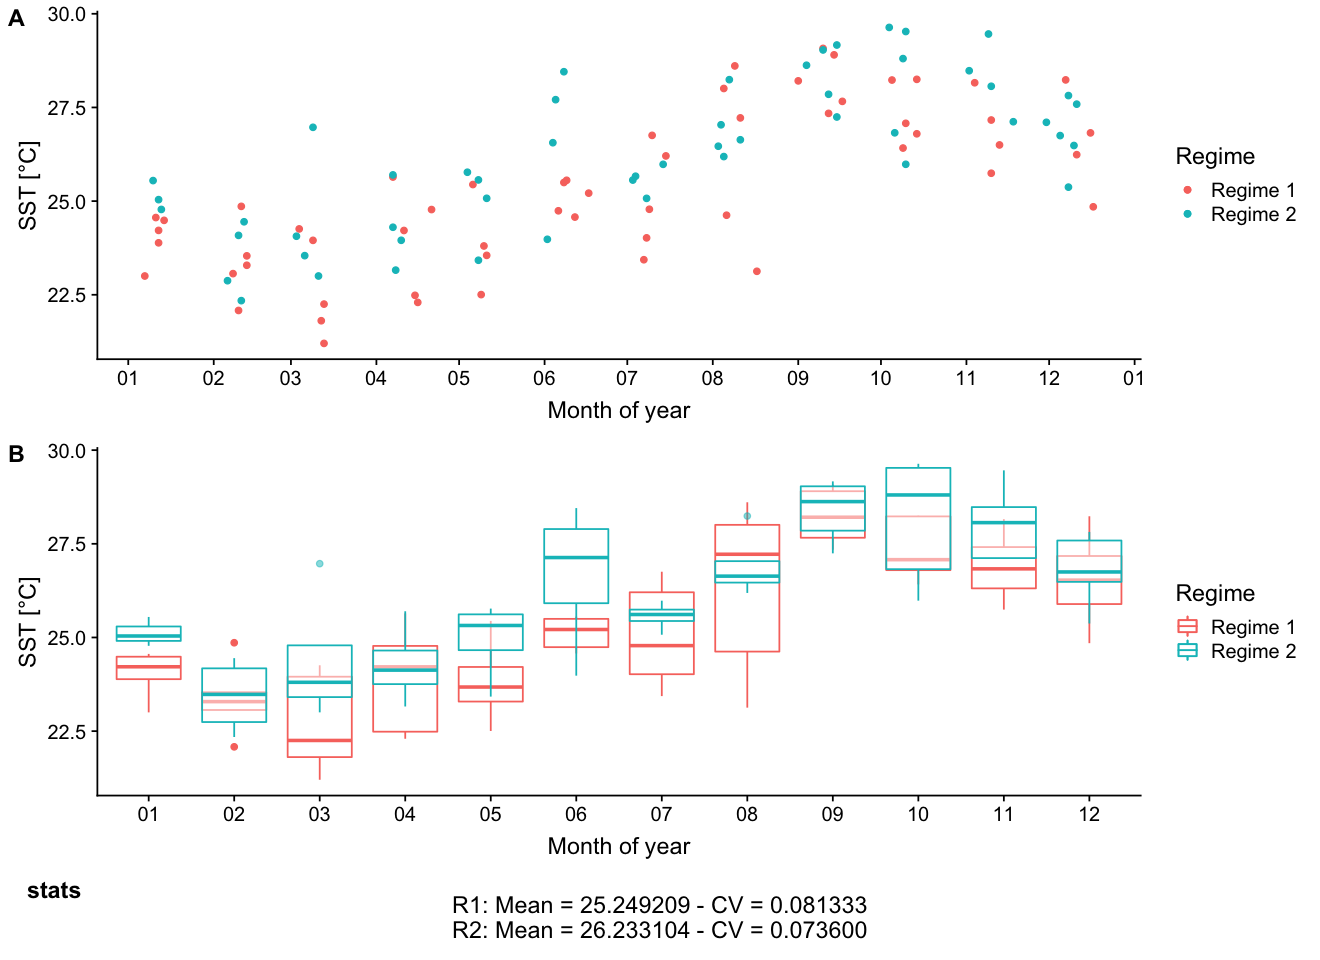

In [76]:
options(repr.plot.width=11, repr.plot.height=8)
SSTmeanR1 <- mean(SST_R1$SST, na.rm=T)
SSTmeanR2 <- mean(SST_R2$SST, na.rm=T)
SSTcvR1 <- sd(SST_R1$SST, na.rm=T)/mean(SST_R1$SST, na.rm=T)
SSTcvR2 <- sd(SST_R2$SST, na.rm=T)/mean(SST_R2$SST, na.rm=T)
SSTstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", SSTmeanR1, SSTcvR1, SSTmeanR2, SSTcvR2))
plot_grid(SST_1, SST_2, SSTstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [77]:
ggsave('ForcingPLOTS/SST.pdf', width=11, height= 8)

In [78]:
SST1 <- SST_R1 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            mean = mean(SST, na.rm=T),
            median = median(SST, na.rm=T)
        )

SST2 <- SST_R2 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            mean = mean(SST, na.rm=T),
            median = median(SST, na.rm=T)
        )

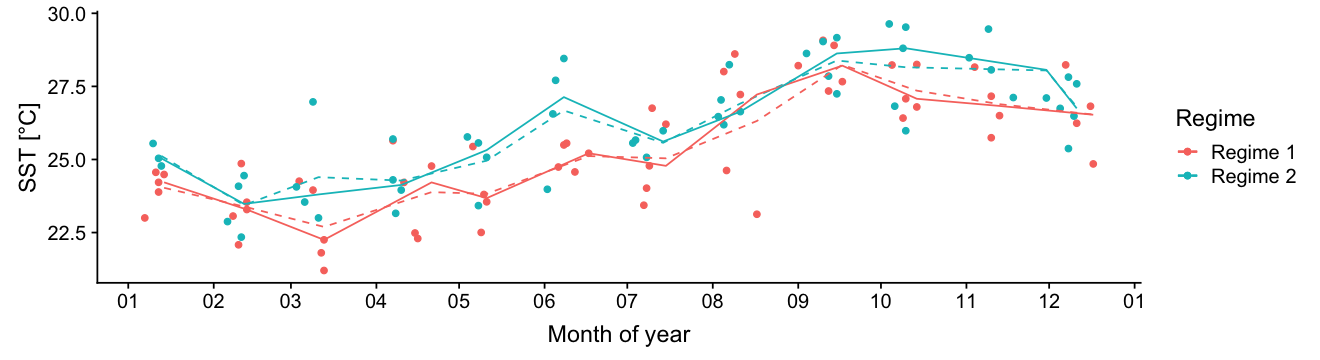

In [79]:
options(repr.plot.width=11, repr.plot.height=3)
ggplot() + geom_point(data=SST_R1,aes(x=dyear, y=SST, col='Regime 1'))+ #scale_y_continuous(trans = 'reverse', limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=SST_R2,aes(x=dyear, y=SST, col='Regime 2')) +
geom_line(data=SST1,aes(x=dyear, y=mean, col='Regime 1'), linetype=2) +
geom_line(data=SST2,aes(x=dyear, y=mean, col='Regime 2'), linetype=2) +
geom_line(data=SST1,aes(x=dyear, y=median, col='Regime 1'), linetype=1) +
geom_line(data=SST2,aes(x=dyear, y=median, col='Regime 2'), , linetype=1) +
scale_x_date(date_breaks = 'months', labels = date_format('%m'))+
ylab('SST [°C]') + xlab('Month of year') + labs(col='Regime')

In [80]:
SSTR1 <- data.frame(SST = SST_R1$SST, month = SST_R1$month, yday = SSTR1yday)
SSTR2 <- data.frame(SST = SST_R2$SST, month = SST_R2$month, yday = SSTR2yday)

In [81]:
# Write CSV in R
write.csv(SSTR1, file = "DATA_modelforcing/SST_R1.csv")
write.csv(SSTR2, file = "DATA_modelforcing/SST_R2.csv")

## PAR from SeaWIFs data

In [82]:
# read MLD and euphotic depth file
SeaWIFs <- read.csv("DATA_processed/SeaWIFs_PAR_monthly_extracted.csv")

# read Date column
date = as.character(paste(SeaWIFs$year,'-',SeaWIFs$month,'-15',sep=''))
SeaWIFs$Date <- as.Date(date, format='%Y-%m-%d')

In [83]:
head(SeaWIFs)

year,month,lon,lat,value,unit,var,Date
1997,10,-64.82900,10.71593,52.826,einstein m^-2 day^-1,par,1997-10-15
1997,10,-64.74461,10.71593,53.282,einstein m^-2 day^-1,par,1997-10-15
1997,10,-64.66020,10.71593,53.538,einstein m^-2 day^-1,par,1997-10-15
1997,10,-64.57581,10.71593,53.390,einstein m^-2 day^-1,par,1997-10-15
1997,10,-64.82900,10.63254,53.182,einstein m^-2 day^-1,par,1997-10-15
1997,10,-64.74461,10.63254,53.286,einstein m^-2 day^-1,par,1997-10-15


In [84]:
PAR1 <- SeaWIFs %>%
    select(Date, value) %>%
    gather(key='key',value = "value", -Date)
head(PAR1)

Date,key,value
1997-10-15,value,52.826
1997-10-15,value,53.282
1997-10-15,value,53.538
1997-10-15,value,53.390
1997-10-15,value,53.182
1997-10-15,value,53.286


In [85]:
de<-data.frame(c(as.Date('1996-10-15'),as.Date('1995-10-15'),as.Date('2012-10-15'),as.Date('2013-10-15')),"value",NA)
names(de)<-c("Date","key","value")

PAR <- rbind(PAR1, de)
tail(PAR)

,Date,key,value
3059,2010-12-15,value,44.204
3060,2010-12-15,value,43.472
3061,1996-10-15,value,NA
3062,1995-10-15,value,NA
3063,2012-10-15,value,NA
3064,2013-10-15,value,NA


In [86]:
# create day of year and month columsn for aggregate plotting
PAR$dyear <- as.Date(format(PAR$Date, format="%m-%d"),format="%m-%d")

PAR$month <- format(PAR$Date, format="%m")

#split data into two regimes:
PAR_R1 <- PAR[!PAR$Date>as.Date('2000-10-30') & !PAR$Date<as.Date('1996-01-01'),]
PAR_R2 <- PAR[!PAR$Date<as.Date('2006-06-30') & !PAR$Date>as.Date('2010-12-31'),]

In [87]:
PARR1ctDate <- as.POSIXlt(PAR_R1$Date)
PARR2ctDate <- as.POSIXlt(PAR_R2$Date)

PARR1yday <- PARR1ctDate$yday
PARR2yday <- PARR2ctDate$yday

In [88]:
options(repr.plot.width=11, repr.plot.height=3)

PAR1 <- ggplot() + geom_jitter(data=PAR_R1,aes(x=dyear, y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_jitter(data=PAR_R2,aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab(bquote('PAR [einstein '~m^-2~ ~d^-1~']')) + xlab('Month of year') + labs(col='Regime')

In [89]:
PAR2 <- ggplot() + geom_boxplot(data=PAR_R1,aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=PAR_R2,aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab(bquote('PAR [einstein '~m^-2~ ~d^-1~']')) + xlab('Month of year') + labs(col='Regime')

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

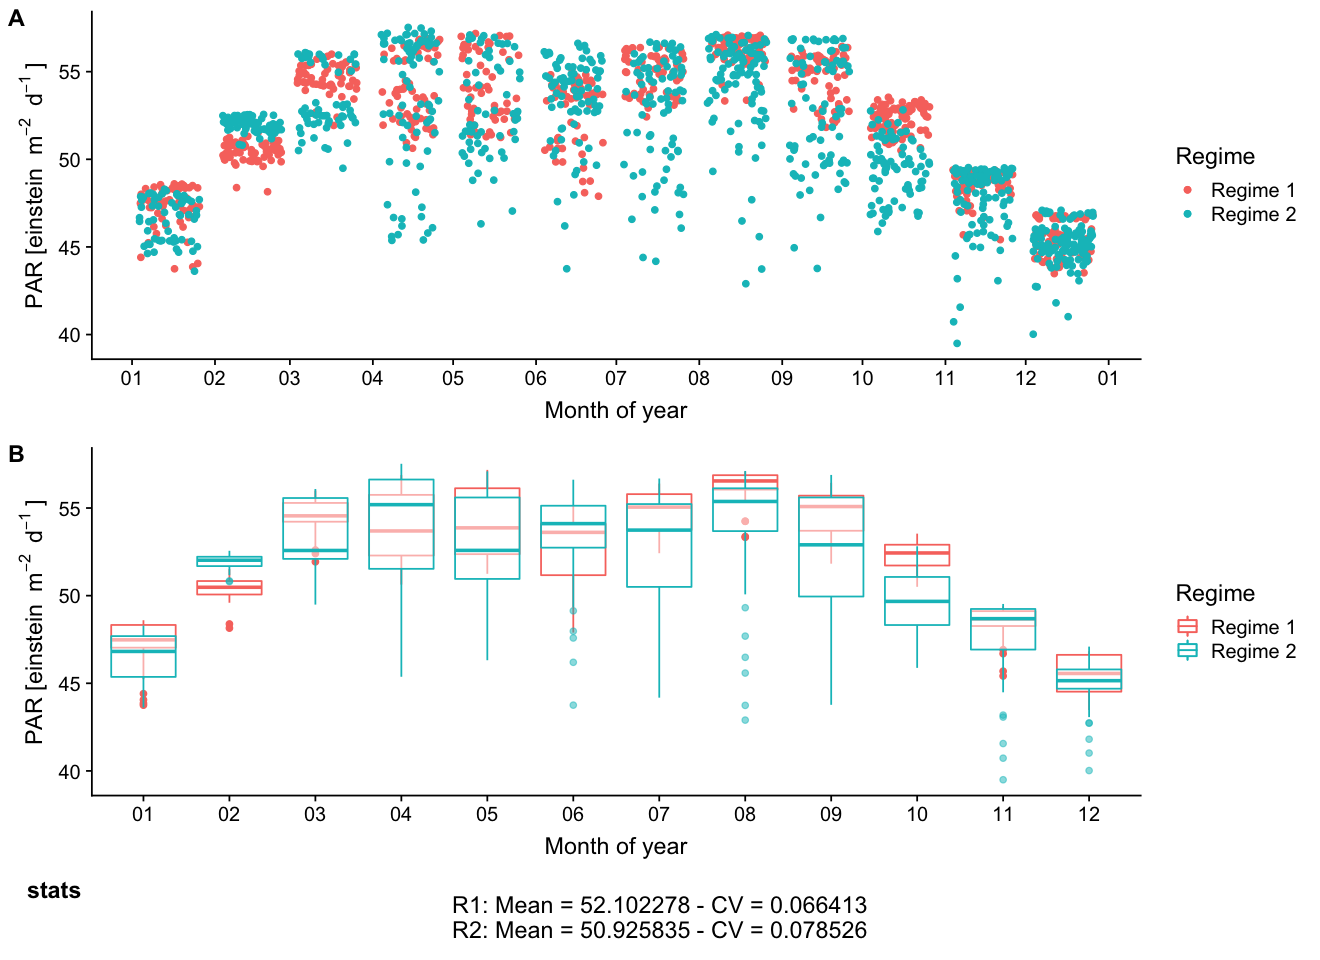

In [90]:
options(repr.plot.width=11, repr.plot.height=8)
PARmeanR1 <- mean(PAR_R1$value, na.rm=T)
PARmeanR2 <- mean(PAR_R2$value, na.rm=T)
PARcvR1 <- sd(PAR_R1$value, na.rm=T)/mean(PAR_R1$value, na.rm=T)
PARcvR2 <- sd(PAR_R2$value, na.rm=T)/mean(PAR_R2$value, na.rm=T)
PARstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", PARmeanR1, PARcvR1, PARmeanR2, PARcvR2))
plot_grid(PAR1, PAR2, PARstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [91]:
ggsave('ForcingPLOTS/PAR.pdf', width=11, height= 8)

In [92]:
PAR1 <- PAR_R1 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            mean = mean(value, na.rm=T),
            median = median(value, na.rm=T)
        )

PAR2 <- PAR_R2 %>% 
        group_by(month) %>% 
        summarise(
            dyear = max(dyear),
            mean = mean(value, na.rm=T),
            median = median(value, na.rm=T)
        )

Warning message:
“Removed 1 rows containing missing values (geom_point).”

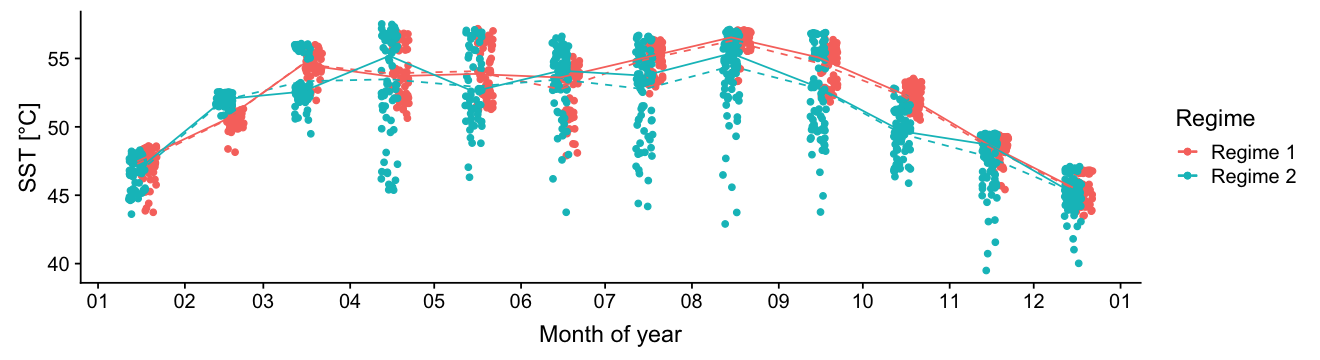

In [93]:
options(repr.plot.width=11, repr.plot.height=3)
ggplot() + geom_jitter(data=PAR_R1,aes(x=dyear+4, y=value, col='Regime 1'), width = 3)+ #scale_y_continuous(trans = 'reverse', limits = c(70,0), breaks=seq(70,0,-10))+
geom_jitter(data=PAR_R2,aes(x=dyear, y=value, col='Regime 2'), width = 3) +
geom_line(data=PAR1,aes(x=dyear, y=mean, col='Regime 1'), linetype=2) +
geom_line(data=PAR2,aes(x=dyear, y=mean, col='Regime 2'), linetype=2) +
geom_line(data=PAR1,aes(x=dyear, y=median, col='Regime 1'), linetype=1) +
geom_line(data=PAR2,aes(x=dyear, y=median, col='Regime 2'), , linetype=1) +
scale_x_date(date_breaks = 'months', labels = date_format('%m'))+
ylab('SST [°C]') + xlab('Month of year') + labs(col='Regime')

In [94]:
PARR1 <- data.frame(PAR = PAR_R1$value, month = PAR_R1$month, yday = PARR1yday)
PARR2 <- data.frame(PAR = PAR_R2$value, month = PAR_R2$month, yday = PARR2yday)

In [95]:
# Write CSV in R
write.csv(PARR1, file = "DATA_modelforcing/PAR_R1.csv")
write.csv(PARR2, file = "DATA_modelforcing/PAR_R2.csv")